In [ ]:
# EJERCICIO 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io 
import bct
import networkx as nx

In [5]:
mat_path = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\BCT\2019_03_03_BCT\data_and_demos\fve32.mat"
mat_json = scipy.io.loadmat(mat_path)
mat_json

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 16:26:48 2007',
 '__version__': '1.0',
 '__globals__': [],
 'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

In [6]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

In [7]:
mat_dict.keys() 

dict_keys(['Names', 'CIJ'])

In [8]:
for key in mat_dict.keys():
    print(mat_dict[key].shape, mat_dict[key].ndim) 

(32,) 1
(32, 32) 2


In [11]:
CIJ_mat = mat_json['CIJ'] # extraer matriz de adyacencia
CIJ_mat

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)

Text(158.22222222222223, 0.5, 'filas')

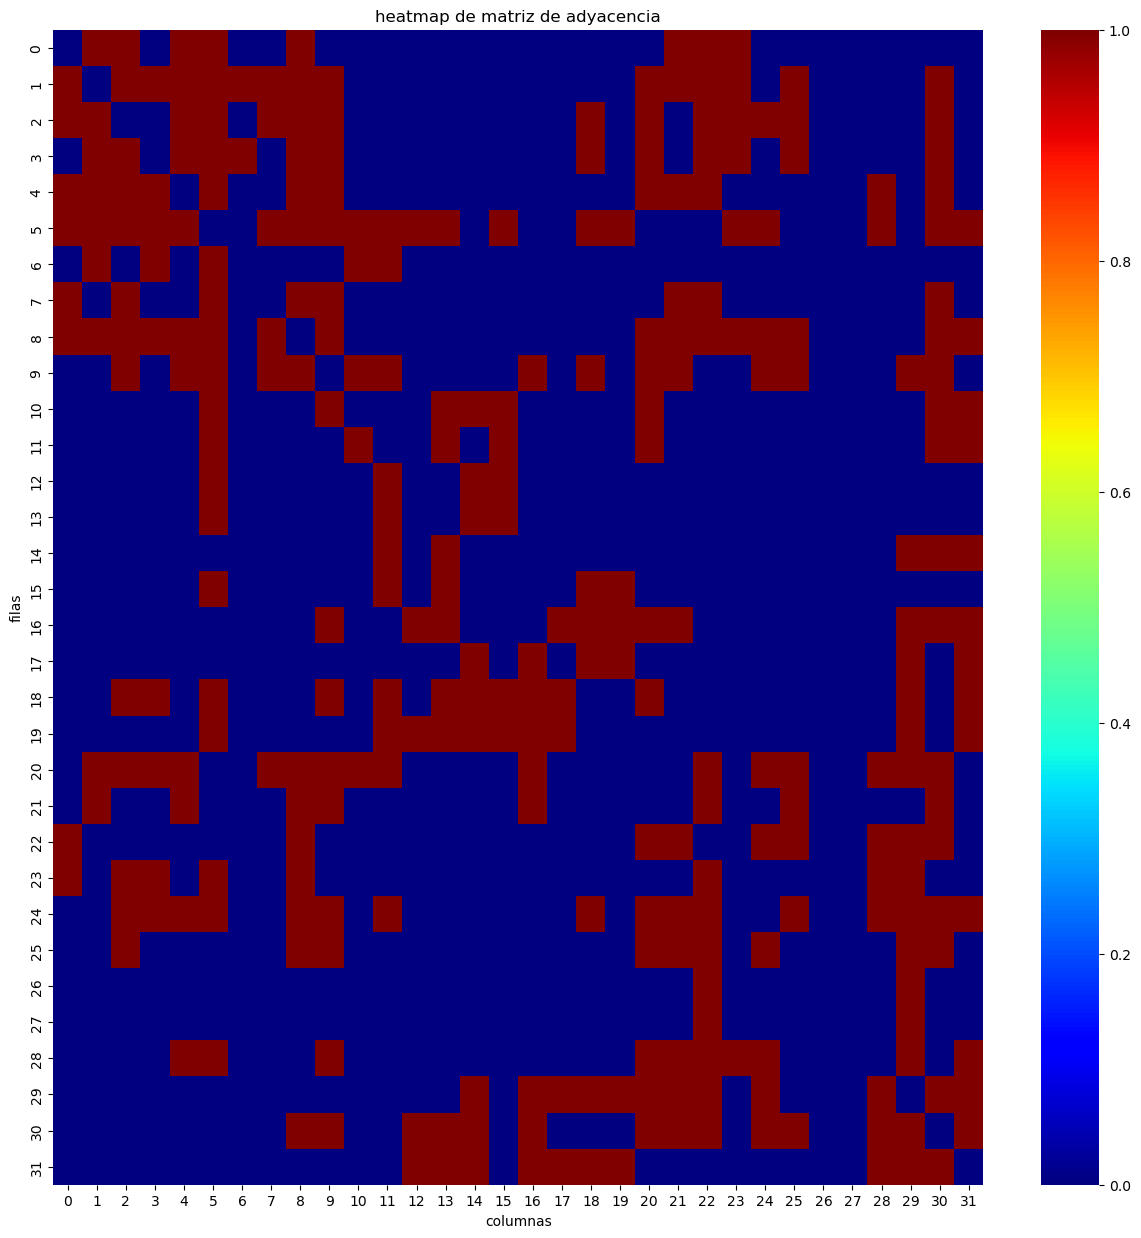

In [12]:
# Muestra el heatmap de la matriz de adyacencia
plt.figure(figsize=(15, 15))
sns.heatmap(mat_dict['CIJ'], cmap = "jet", cbar = True)
plt.title('heatmap de matriz de adyacencia')
plt.xlabel('columnas')
plt.ylabel('filas')

In [30]:
names = mat_dict['Names']
node_labels = {idx: names[idx] for idx in range(len(names))}
node_labels

{0: '  V1',
 1: '  V2',
 2: '  V3',
 3: '  VP',
 4: ' V3a',
 5: '  V4',
 6: ' VOT',
 7: ' V4t',
 8: '  MT',
 9: ' FST',
 10: 'PITd',
 11: 'PITv',
 12: 'CITd',
 13: 'CITv',
 14: 'AITd',
 15: 'AITv',
 16: 'STPp',
 17: 'STPa',
 18: '  TF',
 19: '  TH',
 20: 'MSTd',
 21: 'MSTl',
 22: '  PO',
 23: ' PIP',
 24: ' LIP',
 25: ' VIP',
 26: ' MIP',
 27: ' MDP',
 28: '  DP',
 29: '  7a',
 30: ' FEF',
 31: '  46'}

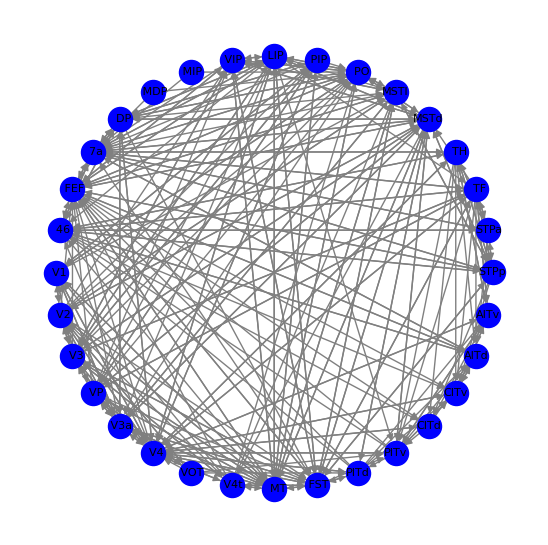

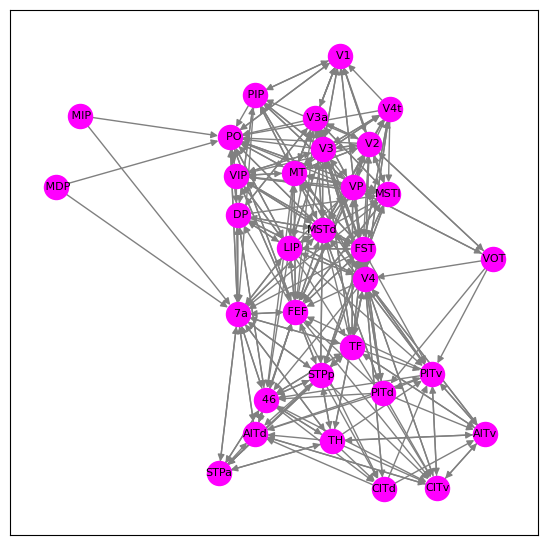

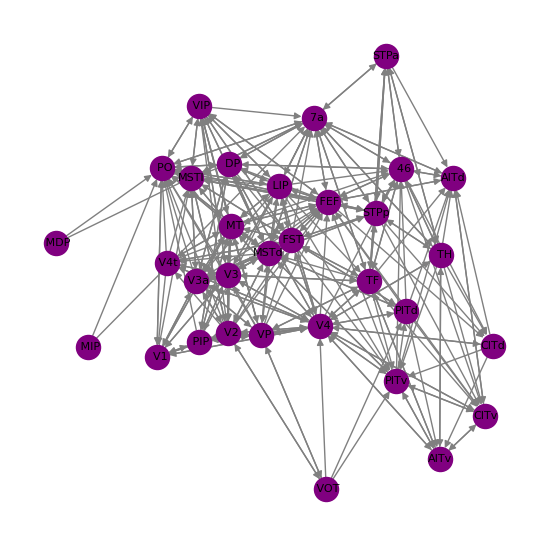

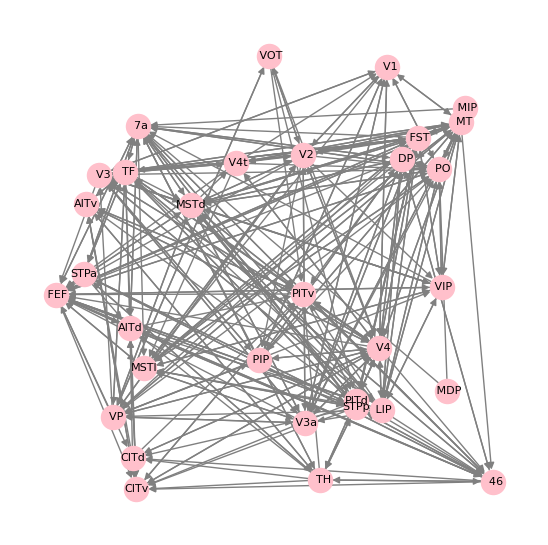

In [31]:
# Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas
# *Shell debe ser una de ellas

# Forma 1
G = nx.from_numpy_array(CIJ_mat, create_using=nx.DiGraph)
plt.figure(figsize = (15, 15))
plt.subplot(221)
nx.draw_shell(G, labels = node_labels, with_labels = True, node_size = 300, node_color = 'blue', font_size = 8, font_color = 'black', edge_color = 'gray')
# Forma 2
plt.figure(figsize = (15, 15))
plt.subplot(222)
nx.draw_networkx(G, labels = node_labels, with_labels = True, node_size = 300, node_color = 'magenta', font_size = 8, font_color = 'black', edge_color = 'gray')
# Forma 3
plt.figure(figsize = (15, 15))
plt.subplot(223)
nx.draw_spring(G, labels = node_labels, with_labels = True, node_size = 300, node_color = 'purple', font_size = 8, font_color = 'black', edge_color = 'gray')
# Forma 4
plt.figure(figsize = (15, 15))
plt.subplot(224)
nx.draw_random(G, labels = node_labels, with_labels = True, node_size = 300, node_color = 'pink', font_size = 8, font_color = 'black', edge_color = 'gray')

In [42]:
# Determina el nodo con mayores conexiones
max_total_node = max(G.degree, key=lambda x: x[1])
print("nodo con mayor grado:", max_total_node)

nodo con mayor grado: (5, 39)


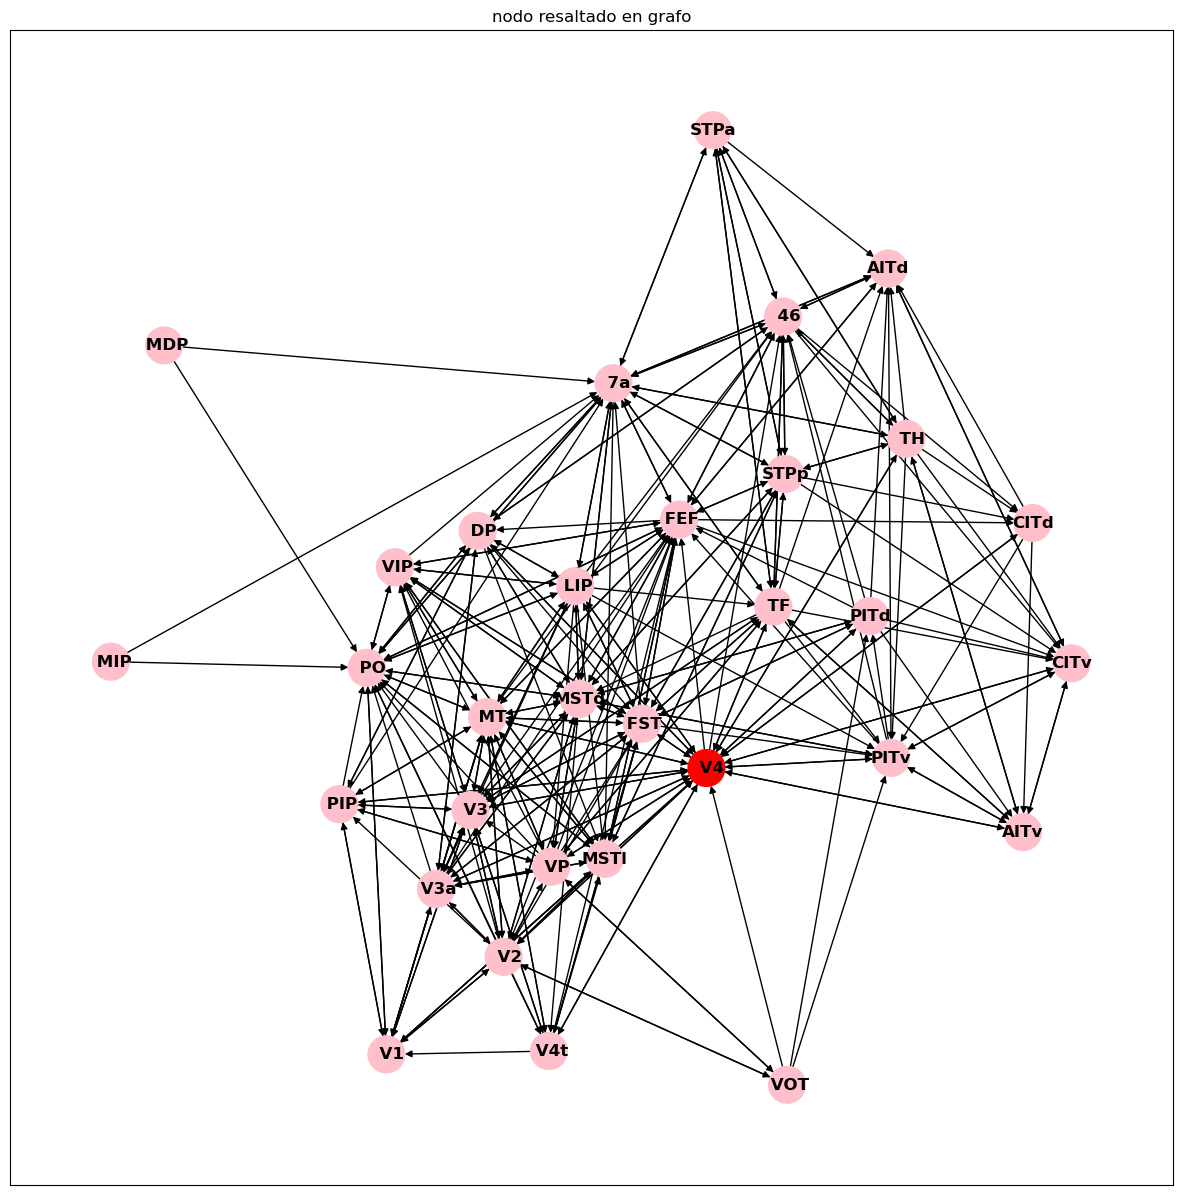

In [43]:
# Resaltar nodo con mayor grado
node_names = {0: '  V1', 1: '  V2', 2: '  V3', 3: '  VP', 4: ' V3a', 5: '  V4', 6: ' VOT', 7: ' V4t', 8: '  MT', 9: ' FST', 10: 'PITd', 11: 'PITv',
 12: 'CITd',
 13: 'CITv',
 14: 'AITd',
 15: 'AITv',
 16: 'STPp',
 17: 'STPa',
 18: '  TF',
 19: '  TH',
 20: 'MSTd',
 21: 'MSTl',
 22: '  PO',
 23: ' PIP',
 24: ' LIP',
 25: ' VIP',
 26: ' MIP',
 27: ' MDP',
 28: '  DP',
 29: '  7a',
 30: ' FEF',
 31: '  46'}
node_name = node_names[5]
plt.figure(figsize=(15, 15))
node_color = 'pink'
node_color_map = [node_color if node != node_max else 'red' for node in G.nodes]
nx.draw_networkx(G, labels = node_names, with_labels = True, node_color = node_color_map, font_weight = 'bold', node_size = 700)
plt.title("nodo resaltado en grafo")
plt.show()